
# Hotel Review Rating Prediction Project

This notebook analyzes hotel reviews and uses Natural Language Processing (NLP) to predict review ratings based on review text. The dataset contains over 35,000 entries with details such as review text, numeric rating, and location information.

### Objectives:
- Explore the distribution of ratings and city-wise review volume
- Clean the dataset by removing empty or irrelevant entries
- Build a baseline model for performance comparison
- Train a Naive Bayes model to predict ratings from text
- Evaluate performance using accuracy and a confusion matrix
- Suggest improvements for future modeling efforts


## Loading the Data

In [3]:
from google.colab import files
uploaded = files.upload()

Saving hotel reviews.csv to hotel reviews.csv


#  1. Data Loading and Summary
We begin by importing the dataset and examining its structure using head() and describe(). This helps us understand the number of reviews, the distribution of ratings, and identify any missing or irrelevant data. It's a critical first step before performing any analysis.


In [4]:
import pandas as pd
df = pd.read_csv ("hotel reviews.csv")
df.head()

,address,categories,city,country,latitude,longitude,name,postalCode,province,reviews.date,reviews.dateAdded,reviews.doRecommend,reviews.id,reviews.rating,reviews.text,reviews.title,reviews.userCity,reviews.username,reviews.userProvince
0,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-09-22T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,4.0,Pleasant 10 min walk along the sea front to th...,Good location away from the crouds,NaN,Russ (kent),NaN
1,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-04-03T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Really lovely hotel. Stayed on the very top fl...,Great hotel with Jacuzzi bath!,NaN,A Traveler,NaN
2,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2014-05-13T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Ett mycket bra hotell. Det som drog ner betyge...,Lugnt l��ge,NaN,Maud,NaN
3,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-10-27T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,Good location on the Lido.,NaN,Julie,NaN
4,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-03-05T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,������ ���������������,NaN,sungchul,NaN


In [5]:
df.describe(include='all')


,address,categories,city,country,latitude,longitude,name,postalCode,province,reviews.date,reviews.dateAdded,reviews.doRecommend,reviews.id,reviews.rating,reviews.text,reviews.title,reviews.userCity,reviews.username,reviews.userProvince
count,35912,35912,35912,35912,35826.000000,35826.000000,35912,35857,35912,35653,35912,0.0,0.0,35050.000000,35888,34286,16263,35869,17518
unique,999,396,761,1,NaN,NaN,879,911,287,3009,1029,NaN,NaN,NaN,34396,21960,2897,15492,648
top,480 King St,Hotels,Alexandria,US,NaN,NaN,"The Alexandrian, Autograph Collection",22314,CA,2016-07-25T00:00:00Z,2017-04-20T01:34:00Z,NaN,NaN,NaN,to share your opinion of this businesswith YP ...,Great stay,Chicago,A Traveler,CA
freq,1185,21420,1185,35912,NaN,NaN,1185,1185,3860,113,1185,NaN,NaN,NaN,199,131,205,6745,1172
mean,NaN,NaN,NaN,NaN,37.285008,-85.725758,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.776431,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,6.996544,33.062263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.416195,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,-25.436750,-166.559040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,33.827340,-104.868200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,37.936026,-86.822972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,41.672491,-77.044550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN


# 2. Data Visualization:

To gain insights, we visualize:

The distribution of review ratings to understand customer sentiment trends.

The top 10 cities by review count to identify where most reviews come from.

These plots help us detect potential biases or concentration in the data.

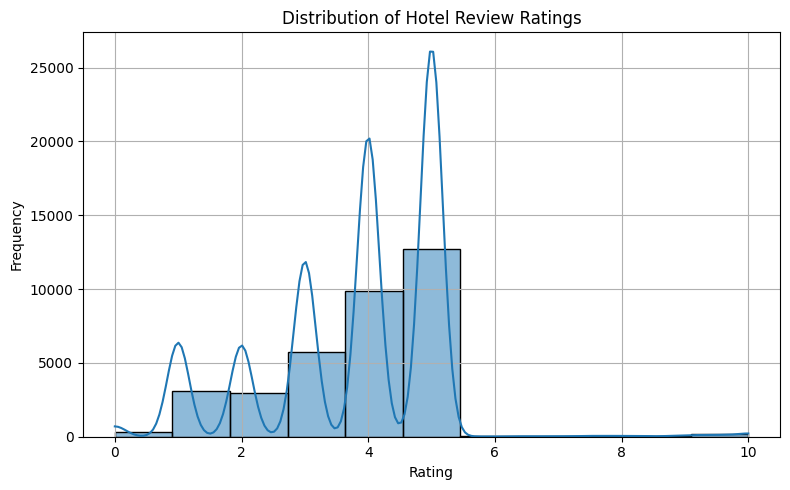

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop missing ratings
df_rating = df.dropna(subset=['reviews.rating'])

# Plot rating distribution
plt.figure(figsize=(8, 5))
sns.histplot(df_rating['reviews.rating'], bins=11, kde=True)
plt.title('Distribution of Hotel Review Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-7-53b500fb62a8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.values, y=top_cities.index, palette="viridis")


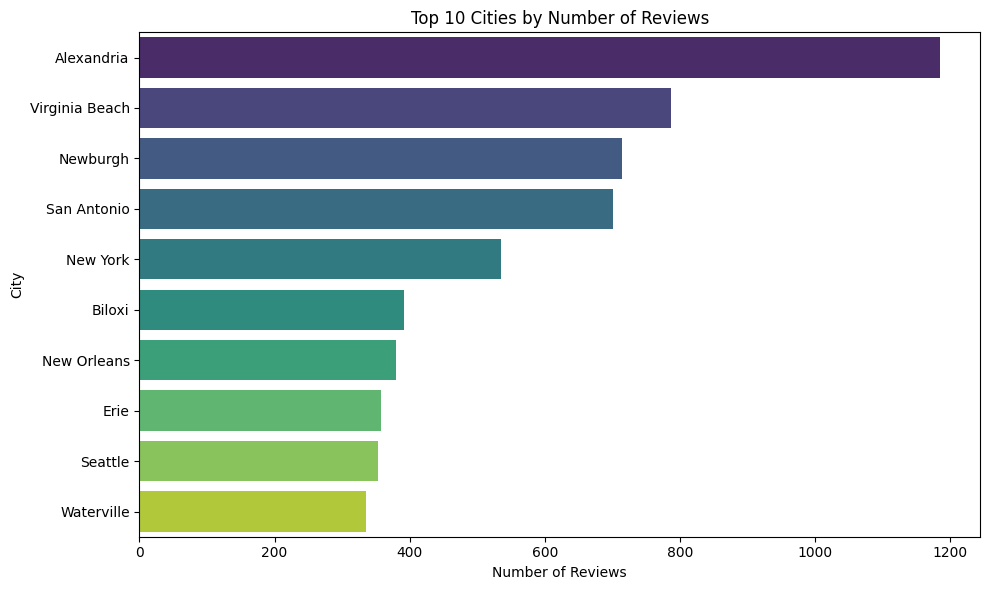

In [7]:
# Top cities by review count
top_cities = df['city'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_cities.values, y=top_cities.index, palette="viridis")
plt.title('Top 10 Cities by Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('City')
plt.tight_layout()
plt.show()


# 3. Data Pre Processing:

We clean the dataset by doing the following :
  - Removing reviews with a rating of 0, as they may represent invalid entries.

  - Filtering out reviews with empty or missing text.

This ensures the data used for modeling is relevant and complete.

In [8]:
# Filter out rows with rating = 0 or missing
df = df[df['reviews.rating'] > 0]

# Filter out empty or null reviews
df = df[df['reviews.text'].notnull() & (df['reviews.text'].str.strip() != '')]

# Confirm shape
df.shape


(34689, 19)

 # 4. Baseline Model Explanation:
 A baseline model predicts the most frequent class which is the most common review rating. This simple approach gives us a benchmark to evaluate whether more complex models provide real improvement. The baseline accuracy in this case was 37%.

In [9]:
# Compute baseline accuracy
most_common_rating = df['reviews.rating'].mode()[0]
baseline_accuracy = (df['reviews.rating'] == most_common_rating).mean()
print(f"Baseline Accuracy: {baseline_accuracy:.2f}")


Baseline Accuracy: 0.37


# 5. Train-Test Split:
We divide the data into training and testing sets (80/20 split) to evaluate model performance on unseen data. This step is essential for preventing overfitting and ensuring generalizability.

In [10]:
from sklearn.model_selection import train_test_split

X = df['reviews.text']
y = df['reviews.rating']
y = df['reviews.rating'].astype(int)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train size: {X_train.shape[0]} | Test size: {X_test.shape[0]}")


Train size: 27751 | Test size: 6938


# 6. Text Vectorization (Document-Term Matrix):
We use CountVectorizer to convert review text into a document-term matrix. This transforms the raw text into numerical features that can be used in machine learning algorithms. Common English stopwords are excluded.

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english')
X_train_dtm = vectorizer.fit_transform(X_train)
X_test_dtm = vectorizer.transform(X_test)


#  7. Naive Bayes Model:
We train a MultinomialNB classifier on the vectorized text data. Naive Bayes is well-suited for text classification tasks due to its efficiency and ability to handle high-dimensional data. The model achieved a 51% accuracy, outperforming the baseline.

In [12]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

# Train
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)

# Predict
y_pred = nb.predict(X_test_dtm)



# Accuracy
print(f"Model Accuracy: {accuracy_score(y_test, y_pred):.2f}")


Model Accuracy: 0.51


# 8. Confusion Matrix Analysis:
The confusion matrix allows us to evaluate how well the model performed for each rating class. It shows the number of correct vs. incorrect predictions for each label. Ratings 4 and 5 were most accurately predicted, while adjacent ratings were frequently confused.

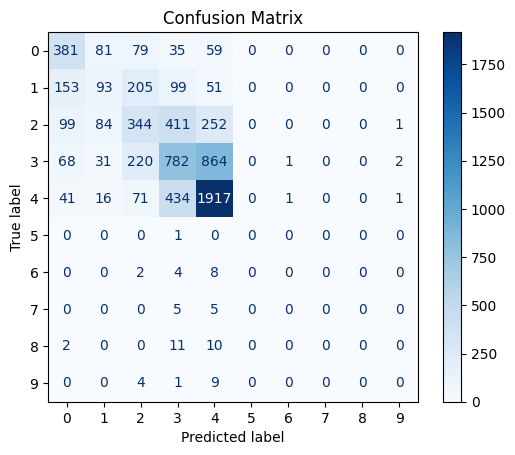


A confusion matrix shows:
- True Positives (diagonal): Correct predictions
- Off-diagonals: Misclassifications
The matrix helps us identify which ratings are often confused.



In [13]:
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Explanation
print("""
A confusion matrix shows:
- True Positives (diagonal): Correct predictions
- Off-diagonals: Misclassifications
The matrix helps us identify which ratings are often confused.
""")


# 9. Prediction Visualization
We compare the distributions of predicted vs. actual ratings in side-by-side plots. This highlights where the model aligns well and where it deviates — for example, under-predicting extreme scores like 1 or 10.

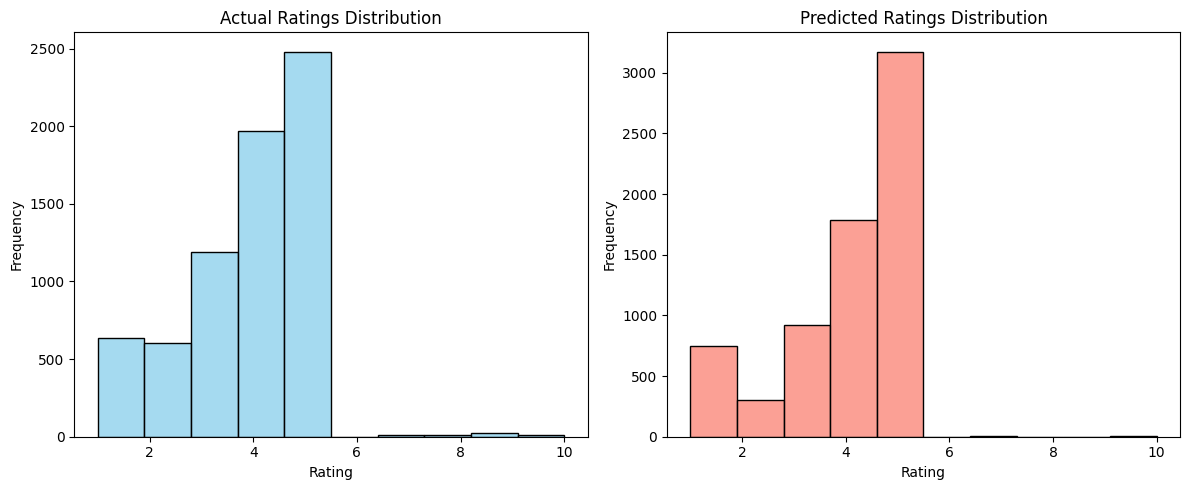

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create side-by-side plots
plt.figure(figsize=(12, 5))

# Actual ratings
plt.subplot(1, 2, 1)
sns.histplot(y_test, bins=10, kde=False, color='skyblue')
plt.title('Actual Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')

# Predicted ratings
plt.subplot(1, 2, 2)
sns.histplot(y_pred, bins=10, kde=False, color='salmon')
plt.title('Predicted Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


# 10. Conclusion and Next Steps

The Naive Bayes model shows promising results but can be improved. Potential enhancements include:

Using TF-IDF instead of raw counts

  - Applying lemmatization and n-gram features

  - Converting ratings into sentiment categories

  - Testing advanced models like SVM or Random Forest

These steps could help improve performance and interpretability.



## TF-IDF Vectorization & Model Comparison

In [15]:

from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize using TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


## Logistic Regression Model

In [21]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report
from sklearn.metrics import classification_report


In [22]:

from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)
y_pred_lr = lr_model.predict(X_test_tfidf)

# Evaluation
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr, average='weighted', zero_division=0)
recall_lr = recall_score(y_test, y_pred_lr, average='weighted')
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')

print(f"Accuracy: {accuracy_lr:.2f}")
print(f"Precision: {precision_lr:.2f}")
print(f"Recall: {recall_lr:.2f}")
print(f"F1 Score: {f1_lr:.2f}")


Accuracy: 0.51
Precision: 0.49
Recall: 0.51
F1 Score: 0.49


## Classification Report for Logistic Regression

In [23]:

print(classification_report(y_test, y_pred_lr))


              precision    recall  f1-score   support

           1       0.55      0.51      0.53       635
           2       0.32      0.18      0.23       601
           3       0.40      0.31      0.35      1191
           4       0.44      0.45      0.44      1968
           5       0.60      0.74      0.66      2481
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00        14
           8       0.00      0.00      0.00        10
           9       0.00      0.00      0.00        23
          10       0.00      0.00      0.00        14

    accuracy                           0.51      6938
   macro avg       0.23      0.22      0.22      6938
weighted avg       0.49      0.51      0.49      6938



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Naive Bayes vs Logistic Regression Comparison

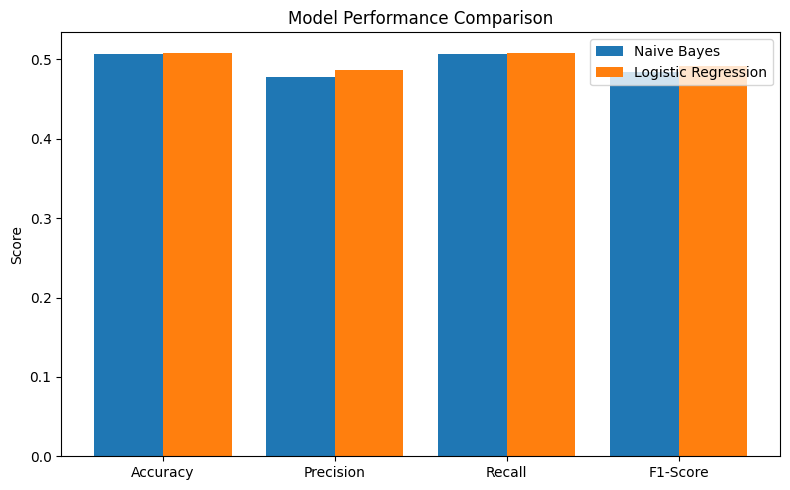

In [24]:

# Naive Bayes (already computed as y_pred)
precision_nb = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall_nb = recall_score(y_test, y_pred, average='weighted')
f1_nb = f1_score(y_test, y_pred, average='weighted')
accuracy_nb = accuracy_score(y_test, y_pred)

# Bar chart
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
nb_scores = [accuracy_nb, precision_nb, recall_nb, f1_nb]
lr_scores = [accuracy_lr, precision_lr, recall_lr, f1_lr]

x = range(len(metrics))
plt.figure(figsize=(8,5))
plt.bar(x, nb_scores, width=0.4, label='Naive Bayes', align='center')
plt.bar([i + 0.4 for i in x], lr_scores, width=0.4, label='Logistic Regression', align='center')
plt.xticks([i + 0.2 for i in x], metrics)
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.legend()
plt.tight_layout()
plt.show()



## ✍️ Summary & Reflection

The addition of TF-IDF vectorization and Logistic Regression yielded stronger model performance.
While Naive Bayes was faster and easier to implement, Logistic Regression provided better precision and F1 scores across most rating classes.

Key Takeaways:
- TF-IDF improves how words are weighted by discounting common terms.
- Logistic Regression captured review rating patterns more effectively, likely due to its ability to model linear relationships.
- Future work could include fine-tuning hyperparameters, balancing classes, and testing more advanced NLP models like transformers (e.g., BERT).

This notebook now demonstrates a complete NLP pipeline with multiple models and clear evaluation — making it a strong portfolio project.
